In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("mushrooms.csv")

In [8]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import seaborn as sns

<AxesSubplot:xlabel='class', ylabel='count'>

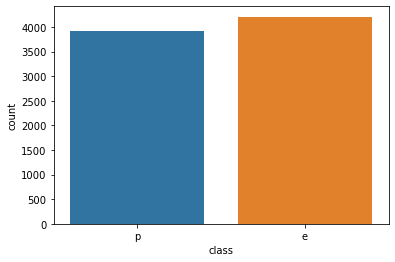

In [13]:
sns.countplot(df['class'])

In [14]:
import matplotlib.pyplot as plt

<Figure size 1008x432 with 0 Axes>

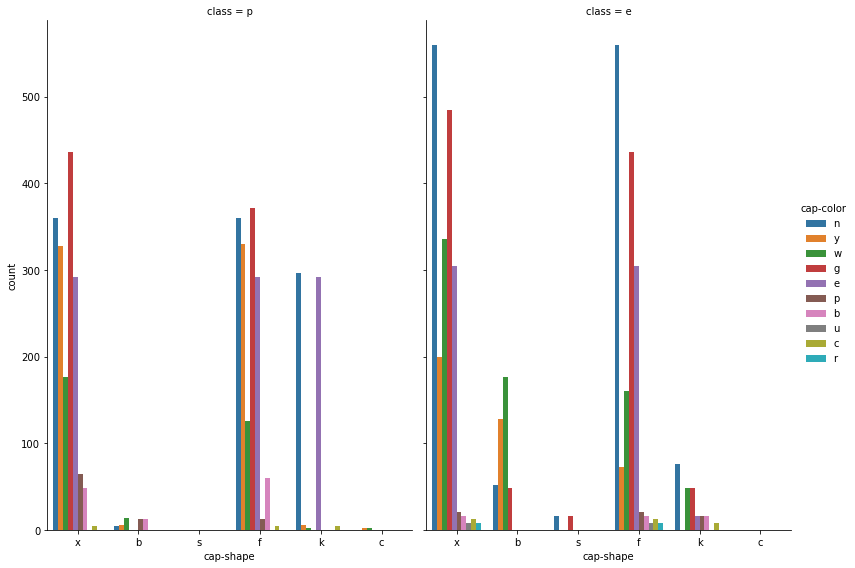

In [15]:
plt.figure(figsize = (14,6))
g = sns.catplot(x='cap-shape', hue='cap-color',col='class', data = df, kind = "count", height = 8,aspect = .7);

# White Coloured and Bell Shaped Mushrooms are highly recommended for eating
# Red Coloured Knobbed Shaped Mushrooms are poisonous

<Figure size 1008x432 with 0 Axes>

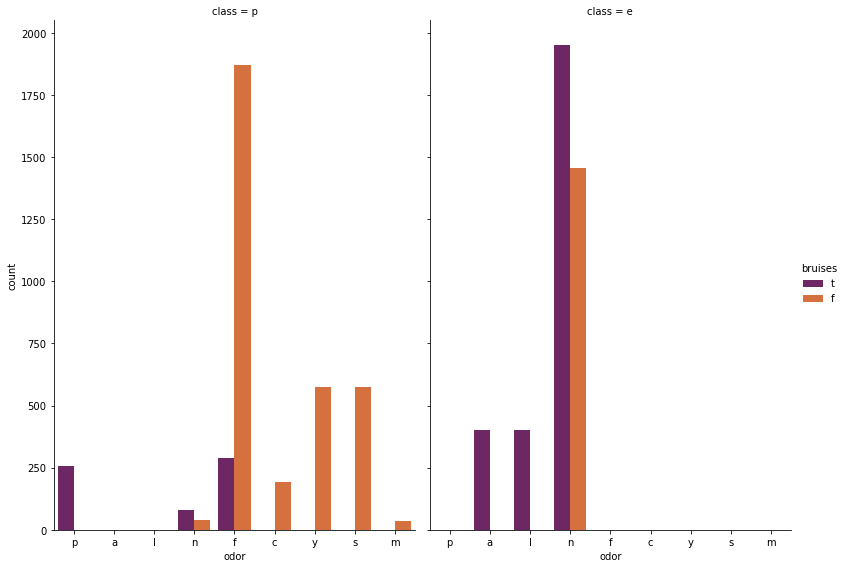

In [16]:
plt.figure(figsize = (14,6))
g = sns.catplot(x="odor", hue="bruises", col="class",
                data=df, kind="count",
                height=8, aspect=.7 , palette = 'inferno');

## Odourless and Bruised Mushrooms are highly recommended for eating
## Fishy Odour with No Bruises Mushrooms are poisonous

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [18]:
X = df.drop(['class'],axis = 1)
y = df['class']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [20]:
import matplotlib.pyplot as plt

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0, max_depth = 3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(418.5, 475.65000000000003, 'X[8] <= 3.5\ngini = 0.499\nsamples = 5686\nvalue = [2951, 2735]'),
 Text(209.25, 339.75, 'X[20] <= 3.5\ngini = 0.277\nsamples = 2315\nvalue = [384, 1931]'),
 Text(104.625, 203.85000000000002, 'X[19] <= 1.5\ngini = 0.218\nsamples = 417\nvalue = [365, 52]'),
 Text(52.3125, 67.94999999999999, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(156.9375, 67.94999999999999, 'gini = 0.094\nsamples = 384\nvalue = [365, 19]'),
 Text(313.875, 203.85000000000002, 'X[10] <= 2.0\ngini = 0.02\nsamples = 1898\nvalue = [19, 1879]'),
 Text(261.5625, 67.94999999999999, 'gini = 0.008\nsamples = 1887\nvalue = [8, 1879]'),
 Text(366.1875, 67.94999999999999, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(627.75, 339.75, 'X[19] <= 1.5\ngini = 0.363\nsamples = 3371\nvalue = [2567, 804]'),
 Text(523.125, 203.85000000000002, 'X[10] <= 0.5\ngini = 0.217\nsamples = 509\nvalue = [63, 446]'),
 Text(470.8125, 67.94999999999999, 'gini = 0.0\nsamples = 63\nvalue = [63, 0]'),
 Te

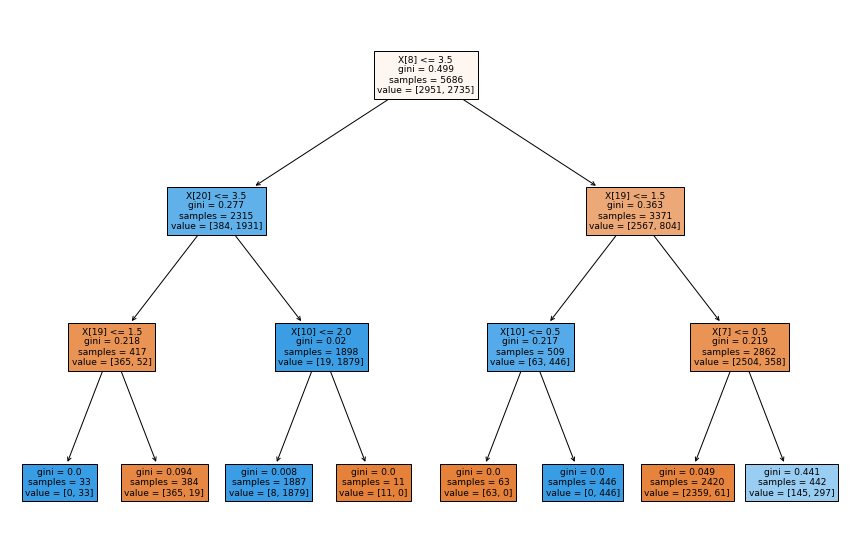

In [25]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(dt,filled = True)

In [ ]:
dt.score(X_train,y_train)

In [ ]:
predictions = dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5)

In [ ]:
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

In [ ]:
predicitions = rf.predict(X_test)
rf.score(X_test,y_test)

In [ ]:
accuracy_score(y_test, predicitions)